# Análise do COVID-19 no Brasil (Infectados)

## 1. Base de Dados Original

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,50,53,59,70,75,82,114,147,177
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,502,511,581,639,639,701,773,839,825,878
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,150,160,178,178,200,212,226,243,266
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,99,117,129,149,149,197,238,428,566,673
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,27,32,32,39,46,64,64,73,103,103
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,38,48,55,65,65,92,112,134,171,210
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,11,15,18,21,21,36,49,57,71,94
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,15,15,18,20,20,35,46,61,68,78
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,2,2,2,3,3,5,7,7,7,33


## 2. Total de casos diários no mundo (ordenação decrescente)

In [2]:
def getSortedGroupByCountryDataframe(df):
    confirmedCasesGroupedDf = df.groupby('Country/Region').sum()
    sortedConfirmedCasesGroupedDf = confirmedCasesGroupedDf.sort_values(by=['Confirmed Cases'], ascending = False)
    return sortedConfirmedCasesGroupedDf

In [3]:
confirmedCasesDf = df.copy()
column_list = list(confirmedCasesDf)
column_list = column_list[-1:]
confirmedCasesDf = confirmedCasesDf.drop(['Province/State', 'Lat', 'Long'], axis=1)
confirmedCasesDf["Confirmed Cases"] = confirmedCasesDf[column_list].astype('int32')

sortedConfirmedCasesGroupedDf = getSortedGroupByCountryDataframe(confirmedCasesDf)
sortedConfirmedCasesGroupedDf.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,80860,80887,80921,80932,80945,80977,81003,81033,81058,81058
Italy,0,0,0,0,0,0,0,0,0,2,...,9172,10149,12462,12462,17660,21157,24747,27980,31506,31506
Iran,0,0,0,0,0,0,0,0,0,0,...,7161,8042,9000,10075,11364,12729,13938,14991,16169,16169
Spain,0,0,0,0,0,0,0,0,0,0,...,1073,1695,2277,2277,5232,6391,7798,9942,11748,11748
Germany,0,0,0,0,0,1,4,4,4,5,...,1176,1457,1908,2078,3675,4585,5795,7272,9257,9257
"Korea, South",1,1,2,2,3,4,4,4,4,11,...,7478,7513,7755,7869,7979,8086,8162,8236,8320,8320
France,0,0,2,3,3,3,4,5,5,5,...,1217,1792,2290,2290,3678,4487,4523,6668,7699,7699
US,1,1,2,2,5,5,5,5,5,7,...,583,959,1281,1663,2179,2727,3499,4632,6421,6421
Switzerland,0,0,0,0,0,0,0,0,0,0,...,374,491,652,652,1139,1359,2200,2200,2700,2700


### 2.1 Total de casos diários somente no Brasil

In [4]:
confirmedCasesByDayBrazilDf = sortedConfirmedCasesGroupedDf.loc[['Brazil']]
confirmedCasesByDayBrazilDf

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
Brazil,0,0,0,0,0,0,0,0,0,0,...,25,31,38,52,151,151,162,200,321,321


In [5]:
dates = list(confirmedCasesByDayBrazilDf)[:-1]
infected = confirmedCasesByDayBrazilDf.iloc[0,:-1]

dfForPlot = pd.DataFrame(
    {'date': dates, 'infected': infected})
dfForPlot['date'] = pd.to_datetime(dfForPlot['date'])
dfForPlot.tail()

,date,infected
3/13/20,2020-03-13,151
3/14/20,2020-03-14,151
3/15/20,2020-03-15,162
3/16/20,2020-03-16,200
3/17/20,2020-03-17,321


Text(0, 0.5, 'Number of cases')

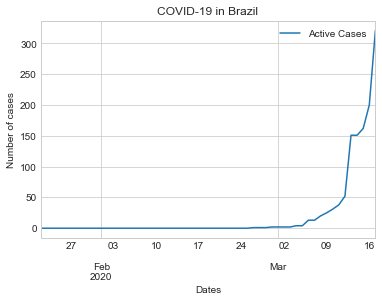

In [6]:
fig = plt.figure()
ax = plt.axes()
dfForPlot.set_index('date')['infected'].plot(legend=True, grid=True, label='Active Cases');
plt.title("COVID-19 in Brazil")
plt.xlabel("Dates")
plt.ylabel("Number of cases")

### 2.2 Total de casos diários somente na Itália

In [7]:
confirmedCasesByDayItalyDf = sortedConfirmedCasesGroupedDf.loc[['Italy']]
confirmedCasesByDayItalyDf

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
Italy,0,0,0,0,0,0,0,0,0,2,...,9172,10149,12462,12462,17660,21157,24747,27980,31506,31506


In [8]:
datesItaly = list(confirmedCasesByDayItalyDf)[:-1]
infectedItaly = confirmedCasesByDayItalyDf.iloc[0,:-1]

dfForPlotItaly = pd.DataFrame(
    {'date': datesItaly, 'infected': infectedItaly})
dfForPlotItaly['date'] = pd.to_datetime(dfForPlotItaly['date'])
dfForPlotItaly.tail()

,date,infected
3/13/20,2020-03-13,17660
3/14/20,2020-03-14,21157
3/15/20,2020-03-15,24747
3/16/20,2020-03-16,27980
3/17/20,2020-03-17,31506


## 3. Total de casos diários acumulados por país (ordenação decrescente)

In [9]:
confirmedCasesOnlyDf = confirmedCasesDf.drop(confirmedCasesDf.columns.difference(['Country/Region','Confirmed Cases']), 1)
confirmedCasesOnlyDf = confirmedCasesOnlyDf.sort_values(by=['Confirmed Cases'],ascending=False)

sortedConfirmedCasesOnlyGroupedDf = getSortedGroupByCountryDataframe(confirmedCasesOnlyDf)
sortedConfirmedCasesOnlyGroupedDf

,Confirmed Cases
Country/Region,
China,81058
Italy,31506
Iran,16169
Spain,11748
Germany,9257
...,...
Congo (Brazzaville),1
Suriname,1
Sudan,1


### 3.1 Total de casos diários acumulados no Brasil

In [10]:
confirmedCasesTotalBrazilDf = sortedConfirmedCasesOnlyGroupedDf.loc[['Brazil']]
confirmedCasesTotalBrazilDf

,Confirmed Cases
Country/Region,
Brazil,321


## 4. Previsão por meio da Regressão

### 4.0 Dados comuns a todos os algoritmos abaixo

In [11]:
def convertCategoricalToNumeric(X):
    from sklearn.preprocessing import LabelEncoder
    labelencoder_X = LabelEncoder()
    X = labelencoder_X.fit_transform(X)

    #one hot encoding
    X = pd.get_dummies(X).values
    X = np.delete(X, 0, axis=1)
    return X

In [12]:
def plotGraph(XTrained, yTrained, XReal, yReal, algorithm):
    df = pd.DataFrame(
    {'dates': X, 'infected': y.astype(int)})
    df['dates'] = pd.to_datetime(df['dates'])

    fig = plt.figure()
    ax = plt.axes()
    df.set_index('dates')['infected'].plot(legend=True, grid=True, label='Active Cases');
    plt.plot(XReal, yReal, 'r:', label='Predicted Cases')
    plt.title("COVID-19 in Brazil ("+algorithm+")")
    plt.xlabel("Dates")
    plt.ylabel("Number of cases")

In [13]:
diasASimular = 200
dfForPlotCopy = dfForPlot[dfForPlot['infected'] != 0]

XTrain = dfForPlotCopy['date'] 
yTrain = dfForPlotCopy['infected']
XReal = dfForPlot['date']
yReal = dfForPlot['infected']

#from datetime import date, timedelta
#XTest = pd.date_range(date.today() + timedelta(days=1), periods=25, freq='D').to_series()

#XTrain = convertCategoricalToNumeric(XTrain)
#XTest = convertCategoricalToNumeric(XTest)

XTrain = np.arange(0, len(XTrain))
X = np.arange(0, len(XTrain) + diasASimular)

### 4.1 Regressão Linear

In [14]:
#treino
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression()
LRModel.fit(XTrain.reshape(-1, 1), yTrain)

#predição
y = LRModel.predict(X.reshape(-1, 1)).astype(int)
y = y + y[0] * -1

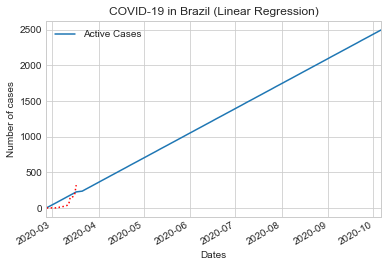

In [15]:
import datetime
X = np.append(dfForPlotCopy['date'], pd.date_range(datetime.date.today() + datetime.timedelta(days=1), periods=diasASimular, freq='D'))
#y = np.append(yTrain, yTest)

plotGraph(X, y, XReal, yReal, "Linear Regression")

### 4.2 Polynomial Regression 2D

In [16]:
XTrain = dfForPlotCopy['date']
yTrain = dfForPlotCopy['infected']
XReal = dfForPlot['date']
yReal = dfForPlot['infected']

#from datetime import date, timedelta
#XTest = pd.date_range(date.today() + timedelta(days=1), periods=25, freq='D').to_series()

#XTrain = convertCategoricalToNumeric(XTrain)
#XTest = convertCategoricalToNumeric(XTest)

XTrain = np.arange(0, len(XTrain))
X = np.arange(0, len(XTrain) + diasASimular)

#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 2)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(X.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1
X

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

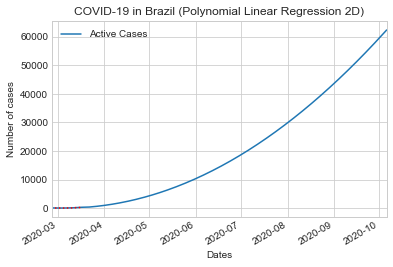

In [17]:
import datetime
X = np.append(dfForPlotCopy['date'], pd.date_range(datetime.date.today() + datetime.timedelta(days=1), periods=diasASimular, freq='D'))
#y = np.append(yTrain, yTest)

plotGraph(X, y, XReal, yReal, "Polynomial Linear Regression 2D")

### 4.3 Polynomial Regression 3D

In [18]:
XTrain = dfForPlotCopy['date']
yTrain = dfForPlotCopy['infected']
XReal = dfForPlot['date']
yReal = dfForPlot['infected']

#from datetime import date, timedelta
#XTest = pd.date_range(date.today() + timedelta(days=1), periods=25, freq='D').to_series()

#XTrain = convertCategoricalToNumeric(XTrain)
#XTest = convertCategoricalToNumeric(XTest)

XTrain = np.arange(0, len(XTrain))
X = np.arange(0, len(XTrain) + diasASimular)

#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 3)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(X.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1
X

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

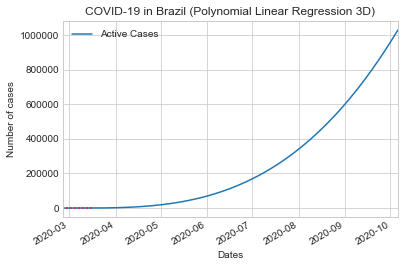

In [19]:
import datetime
X = np.append(dfForPlotCopy['date'], pd.date_range(datetime.date.today() + datetime.timedelta(days=1), periods=diasASimular, freq='D'))
#y = np.append(yTrain, yTest)

plotGraph(X, y, XReal, yReal, "Polynomial Linear Regression 3D")